https://www.kaggle.com/datasets/subirmaity/mosfet-characteristics/data


https://www.infineon.com/dgdl/Infineon-CoolSiC_MOSFET_1200V-SiC_trench_power_device-ApplicationNotes-v01_02-EN.pdf?fileId=5546d462617643590161c27fbcda0aae

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
# plt.style.use('default')
import numpy as np

In [51]:
df = pd.read_csv('training_data.csv')

In [52]:
print(len(df))
print(len(df[df["Vgs"]==0.1]))

df[df["Vgs"]==4.5].describe()

25351
251


,Vds,Vgs,Id
count,251.000000,251.0,251.000000
mean,2.500000,4.5,0.000096
std,1.452033,0.0,0.000022
min,0.000000,4.5,0.000000
25%,1.250000,4.5,0.000100
50%,2.500000,4.5,0.000105
75%,3.750000,4.5,0.000107
max,5.000000,4.5,0.000109


In [53]:
# print(df.head())
# print(df.describe())

print("\nVgs Bins:", len(df["Vgs"].unique()))
print("\nVgs Bins:", df["Vgs"].unique())

print("\nVds Bins:", len(df["Vds"].unique()))
print("\nVds Bins:", df["Vds"].unique())



Vgs Bins: 101

Vgs Bins: [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35
 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.   2.05
 2.1  2.15 2.2  2.25 2.3  2.35 2.4  2.45 2.5  2.55 2.6  2.65 2.7  2.75
 2.8  2.85 2.9  2.95 3.   3.05 3.1  3.15 3.2  3.25 3.3  3.35 3.4  3.45
 3.5  3.55 3.6  3.65 3.7  3.75 3.8  3.85 3.9  3.95 4.   4.05 4.1  4.15
 4.2  4.25 4.3  4.35 4.4  4.45 4.5  4.55 4.6  4.65 4.7  4.75 4.8  4.85
 4.9  4.95 5.  ]

Vds Bins: 251

Vds Bins: [0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.   1.02 1.04 1.06 1.08 1.1
 1.12 1.14 1.16 1.18 1.2  1.22 1.24 1.26 1.28 1.3  1.32 1.34 1.36 1.38
 1.4  1.42 1.44 1.46 1.48 1.5  1.52 1.54 1.56 1.58 1.6  1.62 1.64 1.66
 1.68 1.7

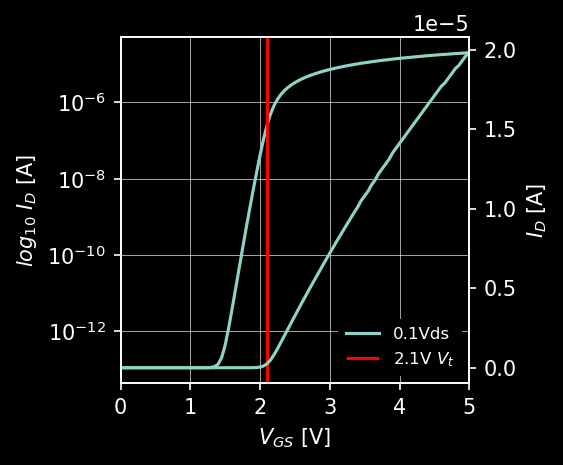

In [54]:
# vds = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
# colours = ["FFC012", "F7A215", "F08418", "E8651B", "E1471E"]

vds = [0.1]


fig, ax = plt.subplots(1, 1, figsize=(3, 3), dpi=150)
ax1 = ax.twinx()
for v in vds:
    dt = df[df["Vds"] == v]
    ax.semilogy(dt["Vgs"], dt["Id"], label=f"{v}Vds",linewidth=1.5)
    ax1.plot(dt["Vgs"], dt["Id"], label=f"{v}Vds",linewidth=1.5)

# ax.hlines(y=250e-9, xmin=0, xmax=5, colors="blue", label="250nA")
ax.vlines(x=2.1, ymin=1e-14, ymax=1e-4, colors="red", label="2.1V $V_{t}$")

ax.set_xlabel("$V_{GS}$ [V]")
ax.set_ylabel("$log_{10}$ $I_{D}$ [A]")
ax1.set_ylabel("$I_{D}$ [A]")

ax.set_yscale('log', base=10)
ax.set_xlim(0.0, 5.0)
# ax.set_ylim(1e-14, 1e-4)
ax.legend(loc="lower right", fontsize=8, fancybox=False, framealpha=1.0, 
          edgecolor="0.0",)
ax.grid(linewidth=.3)

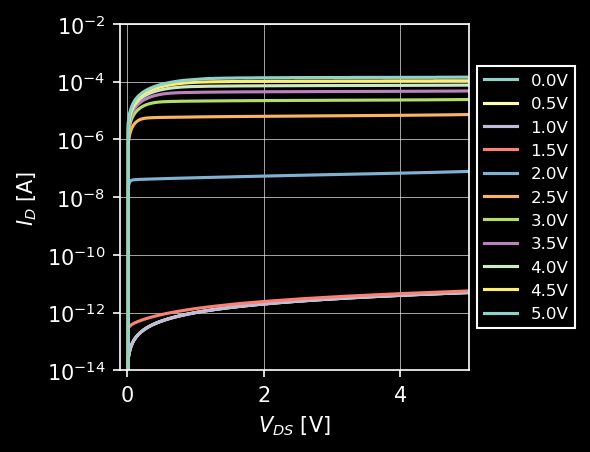

In [55]:
vgs = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

fig, ax = plt.subplots(1, 1, figsize=(3, 3), sharex=True, sharey=True, dpi=150)
for v in vgs:
    dt = df[df["Vgs"] == v]
    ax.semilogy(dt["Vds"], dt["Id"], label=f"{v}V", linewidth=1.5)

# ax.hlines(y=250e-9, xmin=0, xmax=5, colors="blue")

ax.set_xlabel("$V_{DS}$ [V]")
ax.set_ylabel("$I_{D}$ [A]")

# ax.set_yscale('log', base=10)
ax.set_ylim(1e-14, 1e-2)
ax.set_xlim(-0.1, 5.0)
ax.legend(loc="center left", fontsize=8, fancybox=False, framealpha=1.0, edgecolor="1.0", bbox_to_anchor=(1, 0.5))
ax.grid(linewidth=.3)


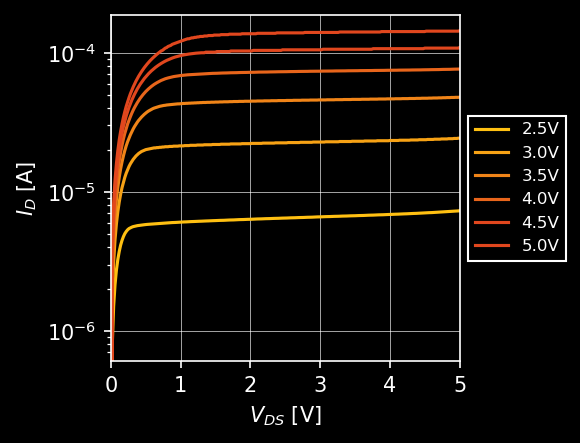

In [56]:
vgs = [2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
colours = ["FFC012", "F7A215", "F08418", "E8651B", "E1471E", "E1471E"]

if len(vgs) == len(colours):
    fig, ax = plt.subplots(1, 1, figsize=(3, 3), sharex=True, sharey=True, dpi=150)
    for v, c in zip(vgs, colours):
        dt = df[df["Vgs"] == v]
        ax.plot(dt["Vds"], dt["Id"], label=f"{v}V", color=f"#{c}",linewidth=1.5)

    ax.set_xlabel("$V_{DS}$ [V]")
    ax.set_ylabel("$I_{D}$ [A]")

    ax.set_yscale('log', base=10)
    ax.set_xlim(0.0, 5.0)
    ax.legend(loc="center left", fontsize=8, fancybox=False, framealpha=1.0, edgecolor="1.0", bbox_to_anchor=(1, 0.5))
    ax.grid(linewidth=.3)
else:
    print("check your lists")

In [57]:
df['Rds'] = df['Vds'] / df ['Id']
df.fillna(0, inplace=True)
df.head()

,Vds,Vgs,Id,Rds
0,0.00,0.0,0.000000e+00,0.000000e+00
1,0.02,0.0,2.770000e-14,7.220217e+11
2,0.04,0.0,4.790000e-14,8.350731e+11
3,0.06,0.0,6.900000e-14,8.695652e+11
4,0.08,0.0,8.950000e-14,8.938547e+11


In [58]:
df1 = df.groupby("Vgs", as_index=False)[["Rds", "Id"]].mean()
df1.head()

,Vgs,Rds,Id
0,0.00,9.855113e+11,2.509937e-12
1,0.05,9.855113e+11,2.509937e-12
2,0.10,9.855113e+11,2.509937e-12
3,0.15,9.855113e+11,2.509937e-12
4,0.20,9.855113e+11,2.509937e-12


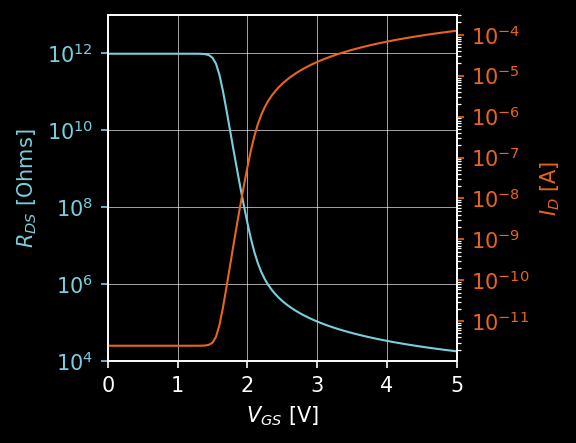

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3), sharex=True, sharey=True, dpi=150)
ax1 = ax.twinx()

lns1 = ax.semilogy(df1["Vgs"], df1["Rds"], color=f"#{"78CFDE"}", linewidth=1.0, 
            label="Rds")
lns2 = ax1.semilogy(df1["Vgs"], df1["Id"], color=f"#{"E8651B"}", linewidth=1.0,
             label="Id")

ax.set_xlabel("$V_{GS}$ [V]")
ax.set_ylabel("$R_{DS}$ [Ohms]")
ax.set_xlim(0.0, 5.0)
ax.set_ylim(1E+4, 1E+13)
ax1.set_ylabel("$I_{D}$ [A]")

ax.yaxis.label.set_color('#78CFDE')
ax.tick_params(axis='y', colors='#78CFDE')
# ax.spines['left'].set_color('#78CFDE')
ax1.yaxis.label.set_color('#E8651B')
ax1.tick_params(axis='y', colors='#E8651B')
# ax1.spines['right'].set_color('#78CFDE')

# combine legend labels
# lns = lns1+lns2
# labs = [l.get_label() for l in lns]
# ax.legend(lns, labs, loc="center right", fontsize=8, fancybox=False, framealpha=1.0, edgecolor="1.0")

ax.grid(linewidth=.3)